# 3. pandas로 데이터 시각화
## (1) pandas를 사용해 그래프 그리기
- `pandas`는 내부적으로 `matplotlib`를 사용하여 데이터의 시각화 기능을 제공합니다.


In [11]:
import pandas as pd
import numpy as np
#!pip install matplotlib
import matplotlib.pyplot as plt

In [12]:
# 임의의 데이터 생성
data = {
    'A': [1,2,3,4,5],
    'B': [1.2, 2.3, 3.4, 4.5, 5.6],
    'C': [9,1,2,7,4]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,1.2,9
1,2,2.3,1
2,3,3.4,2
3,4,4.5,7
4,5,5.6,4


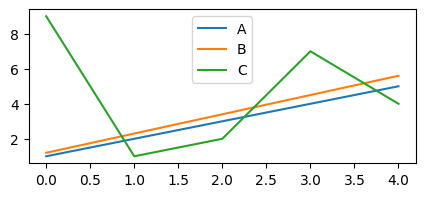

In [13]:
# 선 그래프
df.plot(figsize=(5,2))
plt.show()

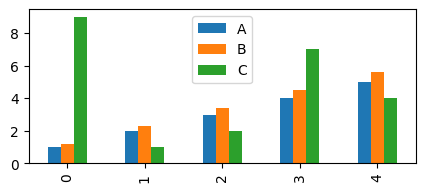

In [14]:
# 막대 그래프
df.plot(kind="bar", figsize=(5,2))
plt.show()

In [16]:
df

,A,B,C
0,1,1.2,9
1,2,2.3,1
2,3,3.4,2
3,4,4.5,7
4,5,5.6,4


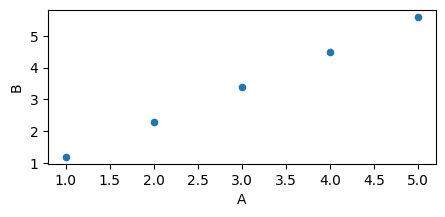

In [15]:
# 산점도
df.plot(kind="scatter", x="A", y="B", figsize=(5,2))
plt.show()

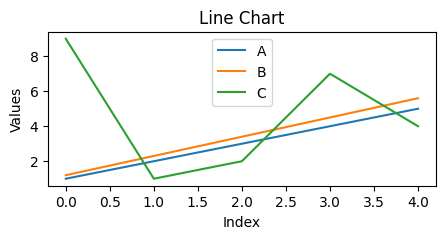

In [17]:
# 각 plot 메소드는 축(axe) 객체를 반환합니다. 이를 사용하여 더 세밀한 설정을 할 수 있습니다.
ax = df.plot(figsize=(5,2))
ax.set_title("Line Chart")
ax.set_xlabel("Index")
ax.set_ylabel("Values")
plt.show()

- 주가 데이터를 읽어와서 pandas로 그래프를 그리는 방법

In [18]:
df = pd.read_csv("../dataset/yfinance_aapl.csv", index_col=0)
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,80507300
1,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,59581200
2,2023-07-21,194.100006,194.970001,191.229996,191.940002,190.926041,71917800


<Axes: xlabel='Date'>

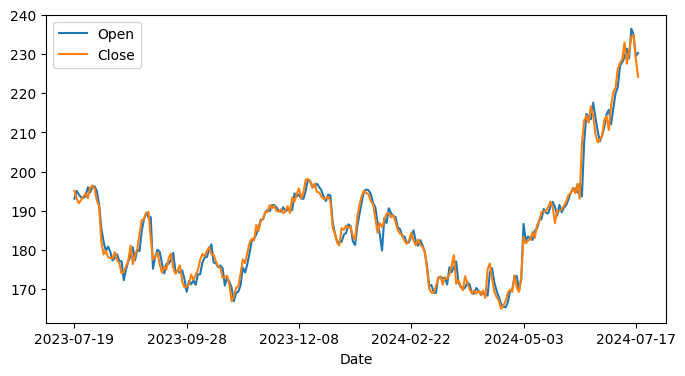

In [19]:
# open, close를 한번에 plot하기
df.plot(x="Date", y=["Open", "Close"], figsize=(8,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

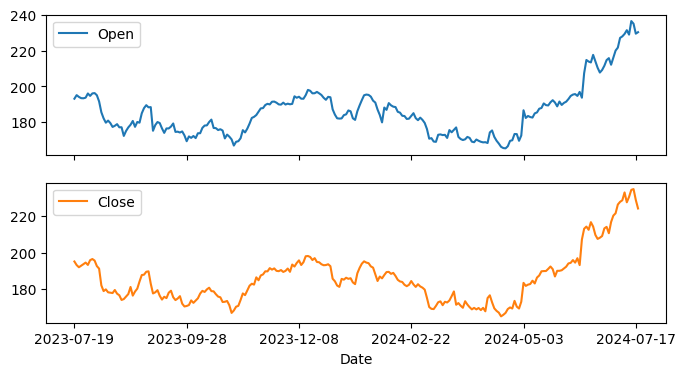

In [20]:
# 각 그래프를 여러 subplot에 나눠서 그리기
df.plot(x="Date", y=["Open", "Close"], figsize=(8,4), subplots=True)

## (2) `Matplotlib`를 사용한 그래프 그리기
- `Matplotlib`는 파이썬에서 가장 널리 사용되는 데이터 시각화 라이브러리 중 하나입니다. 

### 1) `plt.subplots`
- plt.subplots 함수는 피겨(Figure)와 subplot의 축(Axes) 객체를 생성합니다.
    - Figure (fig):
        - Figure는 그래프의 '캔버스'라고 생각할 수 있으며, 그 위에 여러 개의 그래프(Axes)를 그릴 수 있습니다.
    - Axes (axes):
        - 실제 데이터가 표시되는 그래프 부분으로, 축(labels), 타이틀(title), 플롯(plot line) 등 그래프의 실제 요소를 포함합니다. 

In [21]:
import matplotlib.pyplot as plt
import numpy as np

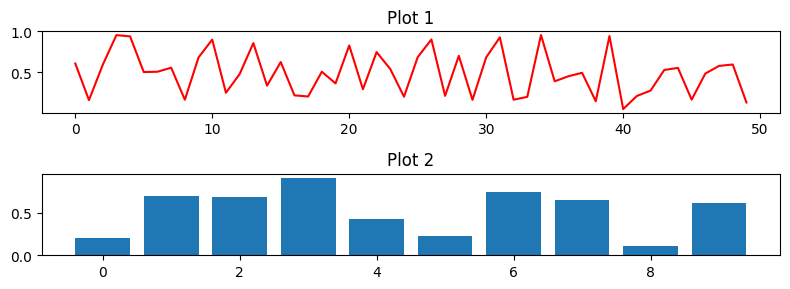

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,3))

ax1.plot(np.random.rand(50), color="red")
ax1.set_title("Plot 1")

ax2.bar(np.arange(10), np.random.rand(10))
ax2.set_title("Plot 2")

plt.tight_layout()
plt.show()



### (2) `matplotlib`를 활용해서 일봉 데이터 그래프 그리기

In [25]:
df = pd.read_csv("../dataset/yfinance_aapl.csv", index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,80507300
1,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,59581200
2,2023-07-21,194.100006,194.970001,191.229996,191.940002,190.926041,71917800


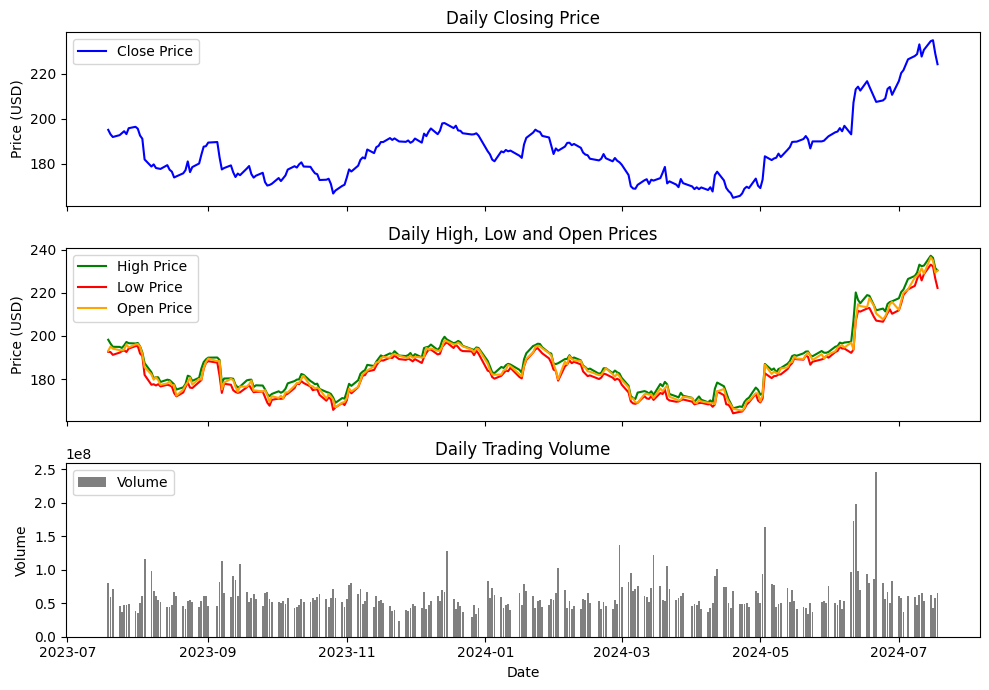

In [32]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,7), sharex=True)


ax1.plot(df["Date"], df["Close"], label="Close Price", color="blue")
ax1.set_title("Daily Closing Price")
ax1.set_ylabel("Price (USD)")
ax1.legend()


ax2.plot(df["Date"], df["High"], label="High Price", color="green")
ax2.plot(df["Date"], df["Low"], label="Low Price", color="red")
ax2.plot(df["Date"], df["Open"], label="Open Price", color="orange")
ax2.set_title("Daily High, Low and Open Prices")
ax2.set_ylabel("Price (USD)")
ax2.legend()


ax3.bar(df["Date"], df["Volume"], label="Volume", color="gray")
ax3.set_title("Daily Trading Volume")
ax3.set_ylabel("Volume")
ax3.set_xlabel("Date")
ax3.legend()

plt.tight_layout()

plt.show()
